In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,chi2,f_oneway,t

In [2]:
os.chdir(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\Analisis_datos_eda\scripts')

In [4]:
from ClaseAbdon import DataFrameAnalyzer

In [5]:
tienda =  pd.read_csv(r"C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\Analisis_datos_eda\data\raw\Merch_sales.csv")

In [6]:
df = tienda.copy()

In [7]:
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [8]:
df.tail()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5,The product was affordable here compared to ot...
7393,138160,2024-10-23,BF1544,Other,Female,28,Cleveland,No,9,0,9,1,9,1,Careless handling by the delivery team.


In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Product ID', 'Product Category',
       'Buyer Gender', 'Buyer Age', 'Order Location', 'International Shipping',
       'Sales Price', 'Shipping Charges', 'Sales per Unit', 'Quantity',
       'Total Sales', 'Rating', 'Review'],
      dtype='object')

In [10]:
df.isnull().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

In [11]:
df.shape

(7394, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [13]:
# No tenemos datos duplicados.
df[df.duplicated()]

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review


In [14]:
# Reemplazamos los " " en las variables por "_".
list1 = []
list2 = []
for col in df.columns:
    list1.append(col.replace(' ','_'))
    list2.append(col)
a = dict(zip(list2,list1))
df.rename(columns=a,inplace=True)

In [15]:
# Transformamos la columna Order Date a DateTime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [16]:
# Eliminamos la columna Review, no trabajaremos sobre ella.
df.pop('Review')

0        The delivery team handled the product with care.
1       Had slight delays but the product was in good ...
2                                         Waste of Money.
3       Had slight delays but the product was in good ...
4         Lack of delivery delays is greatly appreciated.
                              ...                        
7389    The product was affordable here compared to ot...
7390    Exquisite craftsmanship here is absolutely app...
7391                                      Waste of Money.
7392    The product was affordable here compared to ot...
7393              Careless handling by the delivery team.
Name: Review, Length: 7394, dtype: object

In [17]:
# Realizamos una exploracion a los valores unicos de cada columna tipo object.
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========Product_ID===========
Numero de unicos: 13
Valores Unicos: ['BF1543' 'BF1544' 'BF1545' 'BF1546' 'BF1547' 'BF1548' 'BF1549' 'BF1550'
 'BF1551' 'BF1552' 'BF1553' 'BF1554' 'BF1555']


===========Product_Category===========
Numero de unicos: 3
Valores Unicos: ['Clothing' 'Other' 'Ornaments']


===========Buyer_Gender===========
Numero de unicos: 2
Valores Unicos: ['Male' 'Female']


===========Order_Location===========
Numero de unicos: 25
Valores Unicos: ['New Jersey' 'Las Vegas' 'Cardiff' 'Pittsburgh' 'Miami' 'Sydney'
 'Memphis' 'New York' 'Montreal' 'Sacramento' 'Paris' 'San Antonio'
 'Cleveland' 'London' 'Portland' 'Detroit' 'Dublin' 'Glasgow' 'Austin'
 'Toronto' 'Mumbai' 'San Francisco' 'Manchester' 'Liverpool' 'New Delhi']


===========International_Shipping===========
Numero de unicos: 2
Valores Unicos: ['No' 'Yes']




Los datos estan compuestos por 7394 filas y 14 columnas, sin duplicados y tampoco datos missing. Las variables tienen las siguientes descripciones:

|Variable|Descripcion|
|----|----|
|Order_ID|Identificacion de la orden.|
|Order_Date|Fecha de la orden.|
|Product_ID|Identificacion del producto adquirido.|
|Product_Category|Categoria del producto adquirido.|
|Buyer_Gender|Genero del comprador.|
|Buyer_Age|Edad del comprador.|
|Order_Location|Ubicacion del comprador.|
|International_Shipping|¿La orden requiere envio internacional? YES/NO.|
|Sales_Price|Precio unico del producto.|
|Shipping_Charges|Cargos de envio.|
|Sales_per_Unit|Precio unico si son 2 o mas productos.|
|Quantity|Cantidad de productos.|
|Total_Sales|Pago total de la orden.|
|Rating|Puntuacion del comprador.|

In [18]:
analizar = DataFrameAnalyzer(df)

In [19]:
analizar.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,Order_ID,int64,7394,100.00,0,0.0,Índice Numérico
1,Order_Date,datetime64[ns],366,4.95,0,0.0,Otro
2,Product_ID,object,13,0.18,0,0.0,Índice Numérico
3,Product_Category,object,3,0.04,0,0.0,Categórica Nominal
4,Buyer_Gender,object,2,0.03,0,0.0,Binaria
5,Buyer_Age,int64,18,0.24,0,0.0,Numérica Discreta
6,Order_Location,object,25,0.34,0,0.0,Categórica Nominal
7,International_Shipping,object,2,0.03,0,0.0,Binaria
8,Sales_Price,int64,13,0.18,0,0.0,Numérica Discreta
9,Shipping_Charges,int64,6,0.08,0,0.0,Numérica Discreta


Tenemos 2 datos categoricos nominales, 2 binarios, 7 numericos discretos, fecha y indices. No tenemos missing y la cardinalidad en la mayoria de variables es baja.

In [20]:
analizar.describe_categorical()

,unique_values,most_frequent,frequency,proportion
Product_ID,13,BF1548,1497,20.25
Product_Category,3,Clothing,3704,50.09
Buyer_Gender,2,Male,5188,70.16
Order_Location,25,New Jersey,434,5.87
International_Shipping,2,No,5139,69.50


Podemos observar que el tipo de producto mas vendido es "CLOTHING", el genero que mas ha comprado es el "MALE" y la ubicacion en la que se han realizado mas ordenes es en New Jersey. Mas adelante analizaremos a profundidad estos resultados.

In [21]:
analizar.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
Buyer_Age,7394.0,26.455504,26.0,34,5.208202,18.0,22.0,26.0,31.0,35.0,0.010084,-1.214206
Sales_Price,7394.0,55.165404,65.0,65,39.575614,9.0,15.0,65.0,97.0,130.0,0.338032,-1.250453
Shipping_Charges,7394.0,14.633487,0.0,0,24.815719,0.0,0.0,0.0,40.0,100.0,1.652604,2.051472
Sales_per_Unit,7394.0,69.798891,65.0,65,46.702326,9.0,20.0,65.0,100.0,230.0,0.449140,-0.516342
Quantity,7394.0,1.668109,1.0,1,1.081398,1.0,1.0,1.0,2.0,5.0,1.577708,1.487874
Total_Sales,7394.0,115.832026,90.0,65,118.067960,9.0,40.0,90.0,137.0,1000.0,2.258077,6.602692
Rating,7394.0,3.499053,4.0,4,1.389731,1.0,3.0,4.0,5.0,5.0,-0.603098,-0.911546


Vemos que la edad promedio de los compradores es de 26 años 'casi' igual que la media, esto indica que los datos estan centralizados y con pocos valores en los extremos. 
En el precio de venta vemos que hay una STD elevada, esto se debe ser indicativo a que los precios oscilan entre 9$ y 130$.
En los cargos por envio vemos que la media es de 14.63$ pero la mediana y la moda son 0$, lo que indica que en la mayoria de pedidos no requieren cargos de envio o el coste es muy bajo.
El promedio de la cantidad de productos por orden es de 1.66 con una mediana de 1, esto indica que la mayoria de las ordenes son de 1 producto.
El promedio de ventas totales es de 115.83$ con una mediana de 90$, pero vemos que hay un maximo de 1000$ indicando que hay una pequeña cantidad de ordenes que generan montos elevados.


In [22]:
df.to_csv('Merch_processed.csv',index=0) # Guardamos DataFrame procesado

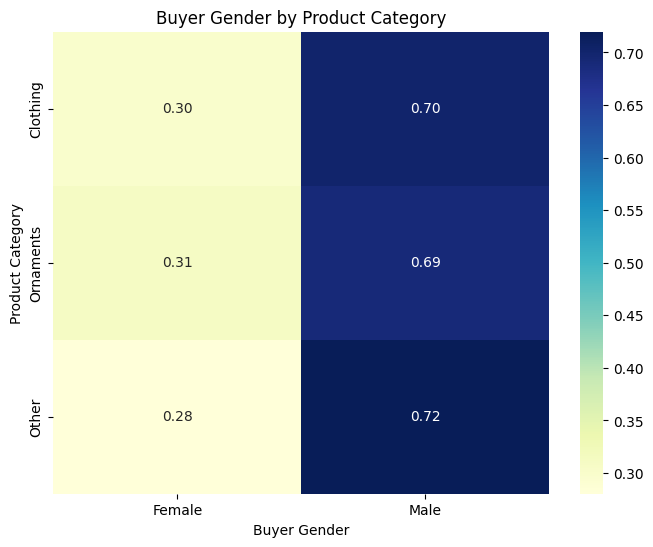

In [23]:
# 'Product_Category' y 'Buyer_Gender'
cross_tab = pd.crosstab(df['Product_Category'], df['Buyer_Gender'], normalize='index')  # Proporciones por categoría de producto

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Buyer Gender by Product Category")
plt.xlabel("Buyer Gender")
plt.ylabel("Product Category")
plt.show()


In [24]:
# Test CHI2

contingency_table = pd.crosstab(df['Product_Category'], df['Buyer_Gender'])
chi_2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi_2},\n p-Value: {p}, \n Valores esperados:\n{expected}")

alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, dof)
print("Valor crítico:", chi2_critical)


Chi2: 4.006793038685365,
 p-Value: 0.13487639408345306, 
 Valores esperados:
[[1105.08845009 2598.91154991]
 [ 673.07763051 1582.92236949]
 [ 427.83391939 1006.16608061]]
Valor crítico: 5.991464547107979


## Conclusion Test de chi2 Product_category y Buyer_gender
Con base en el resultado de la prueba de chi-cuadrado, podemos concluir que no hay una relación significativa entre la categoría de producto y el género del comprador en este conjunto de datos. La diferencia observada entre las categorías es probablemente debida al azar y no a una asociación real entre las variables.

In [25]:
# ANOVA TOTAL_SALES Y PRODUCT_CATEGORY

categories = [df[df['Product_Category'] == category]['Total_Sales'] for category in df['Product_Category'].unique()]
f_statistic, p_value = f_oneway(*categories)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 1120.6621251725408, p-value: 0.0


## Conclusion de ANOVA entre Product_Category y Total_Sales
Con base en los resultados del test de ANOVA , podemos concluir que existe una diferencia significativa entre las medias de Product_category y total_Sales. Esto sugiere que las variables que estamos analizando tienen un efecto diferente en las distintas categorias, y la diferencia no es producto del azar.

In [26]:
# ANOVA BUYER_GENDER Y TOTAL_SALES

categories = [df[df['Buyer_Gender'] == category]['Total_Sales'] for category in df['Buyer_Gender'].unique()]
f_statistic, p_value = f_oneway(*categories)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 0.01710476781088159, p-value: 0.8959487922596888


## Conclusion de ANOVA entre Buyer_Gender y Total_Sales
Con base en estos resultados, no encontramos diferencias significativas entre las medias de las categorías: Product_Category y Buyer_Gender. Es decir, el género del comprador no influye significativamente en la compra por la categoria de los productos.

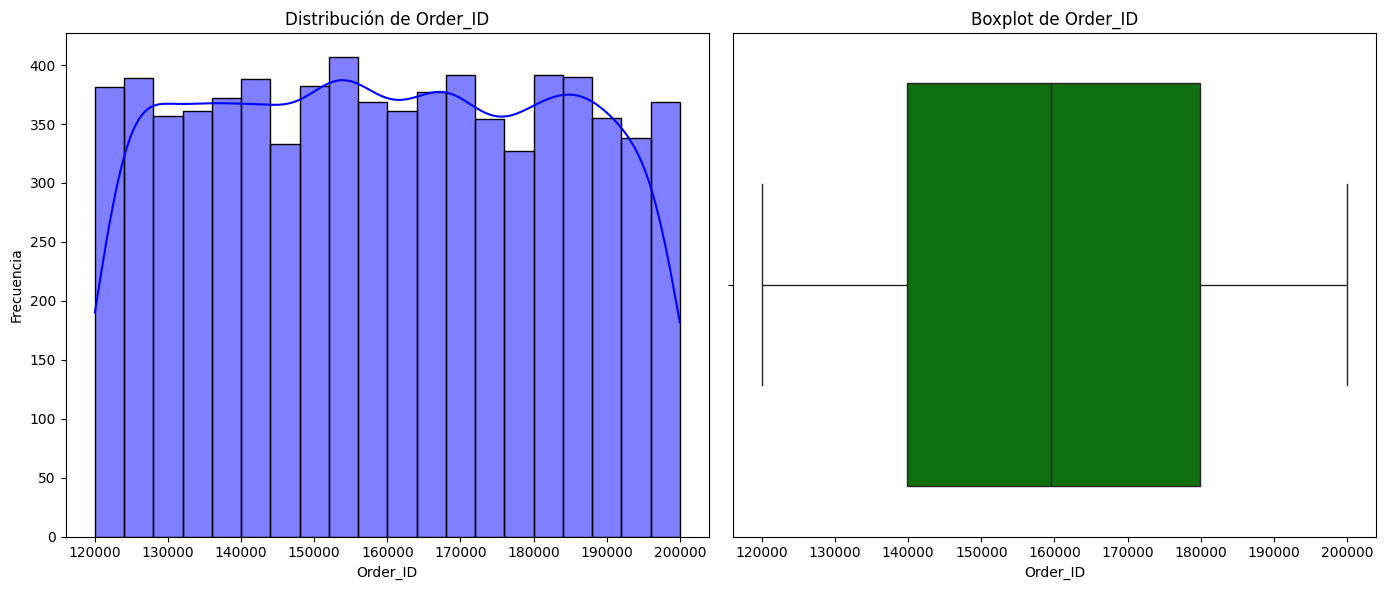

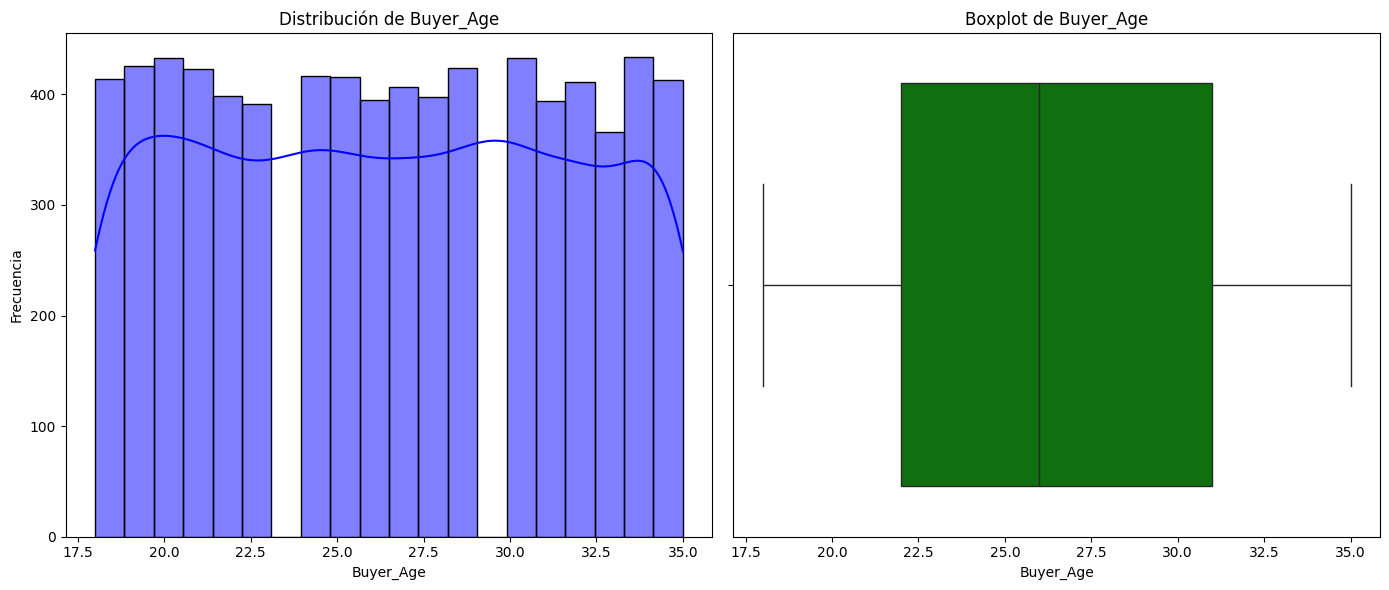

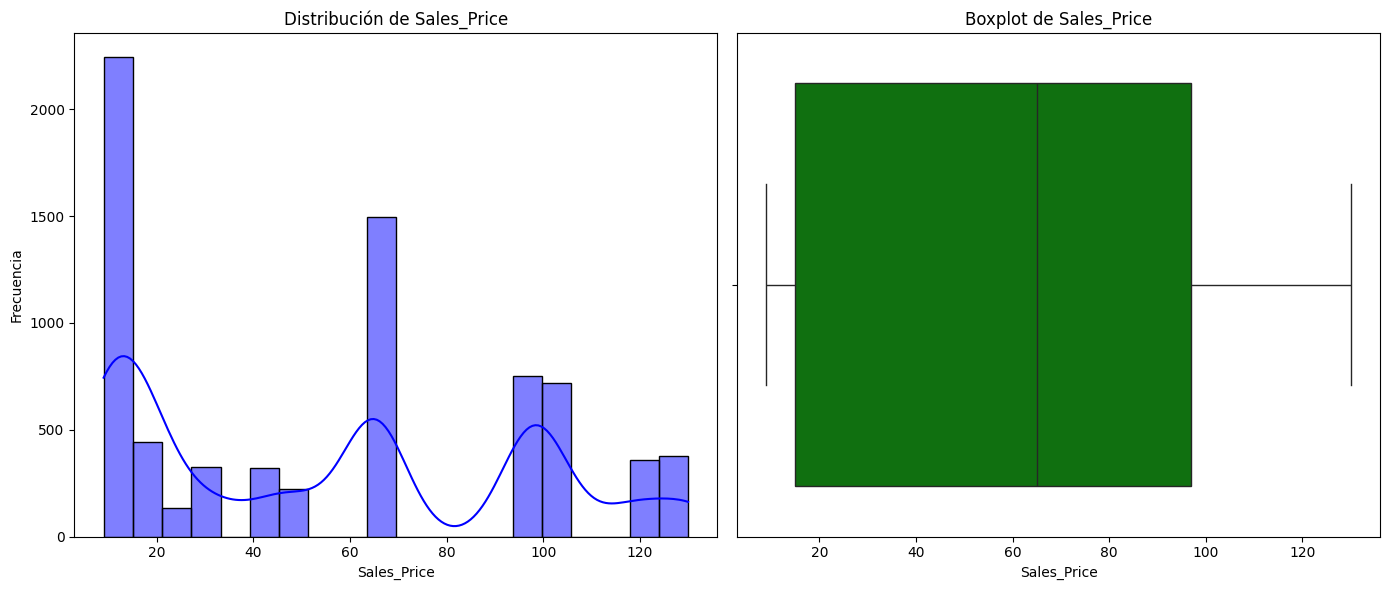

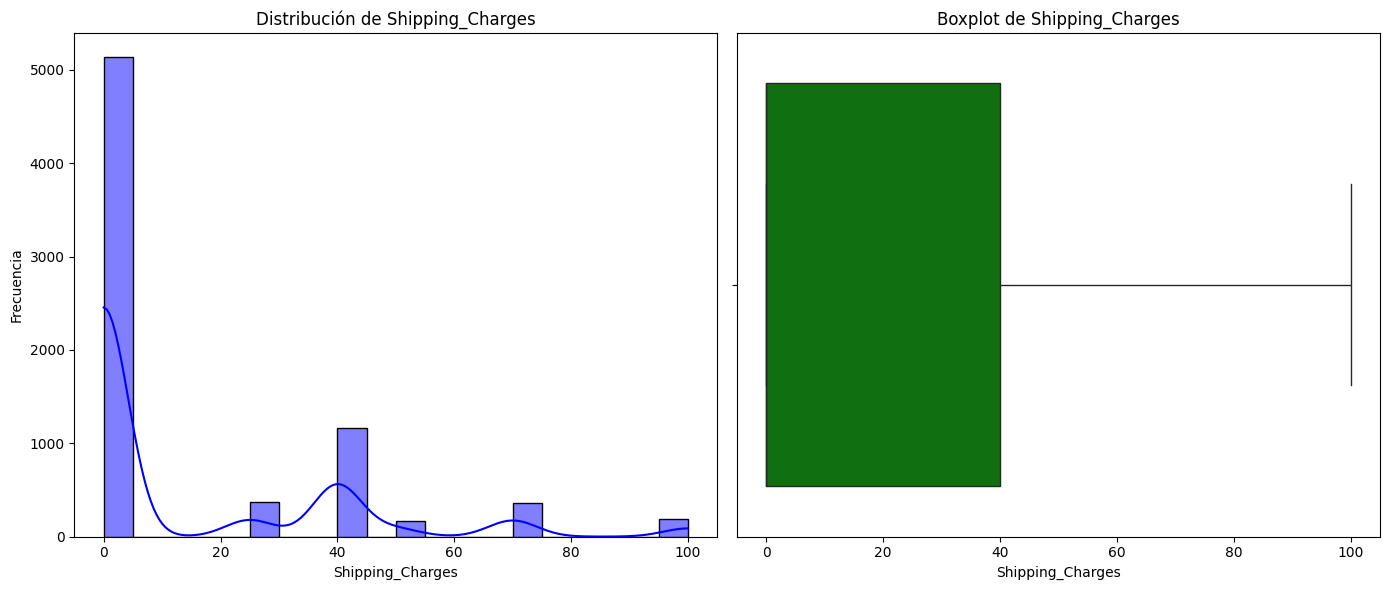

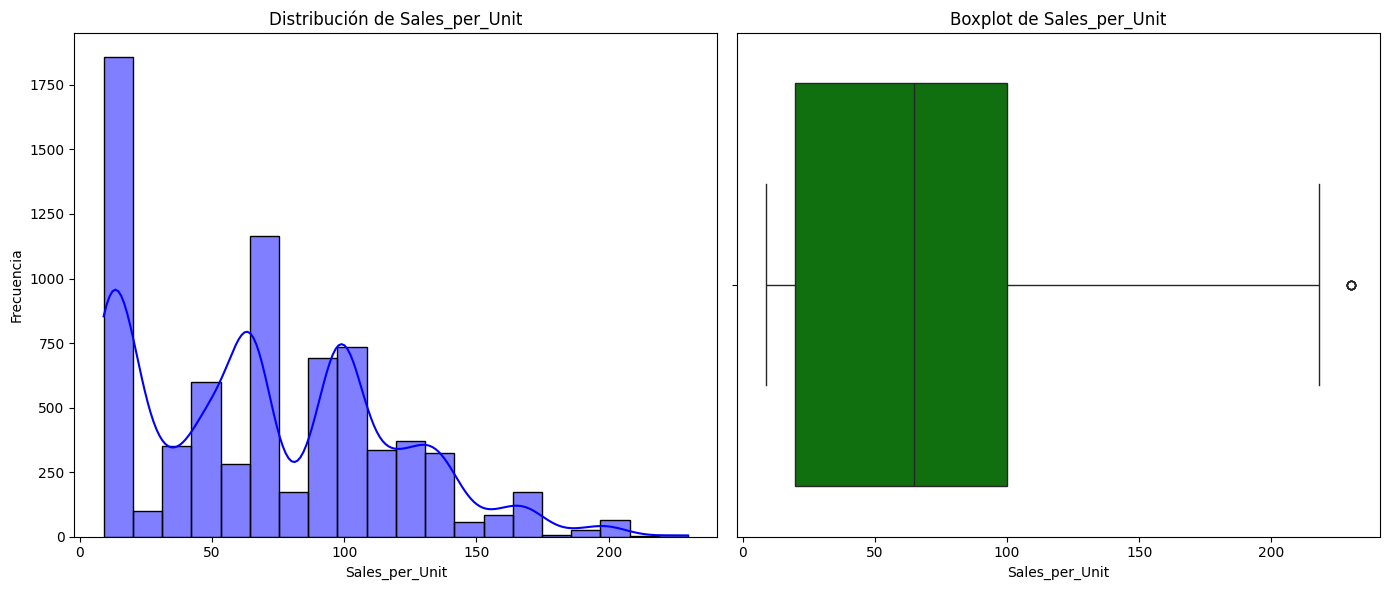

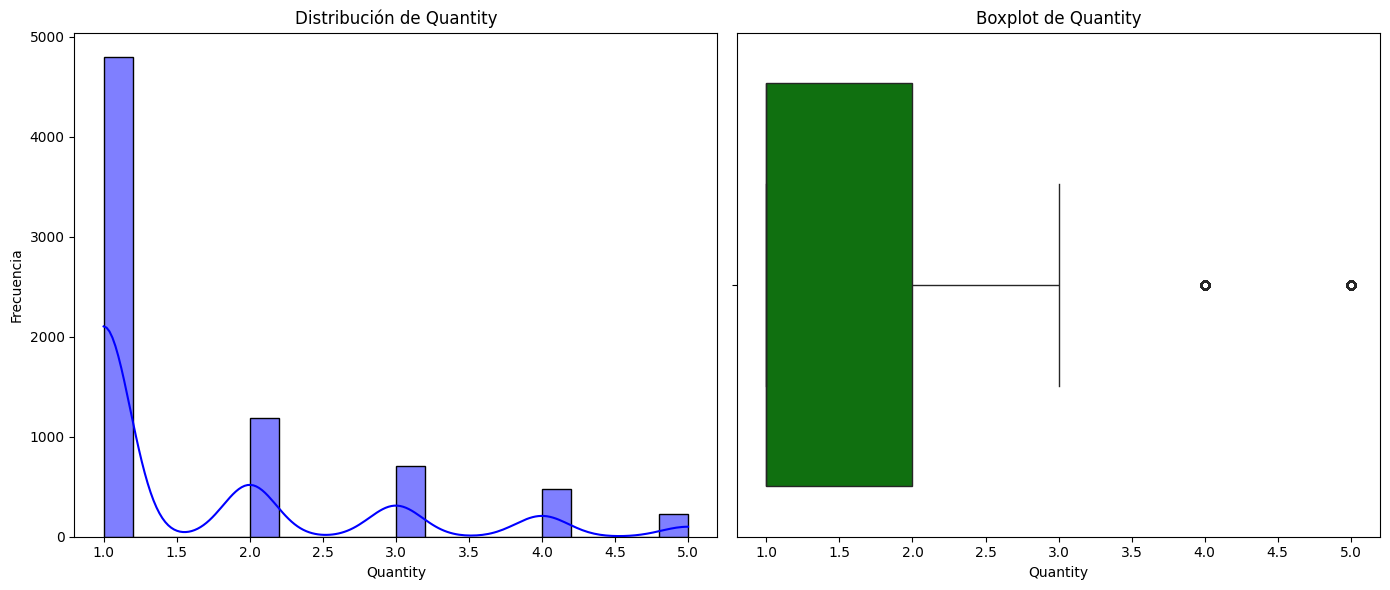

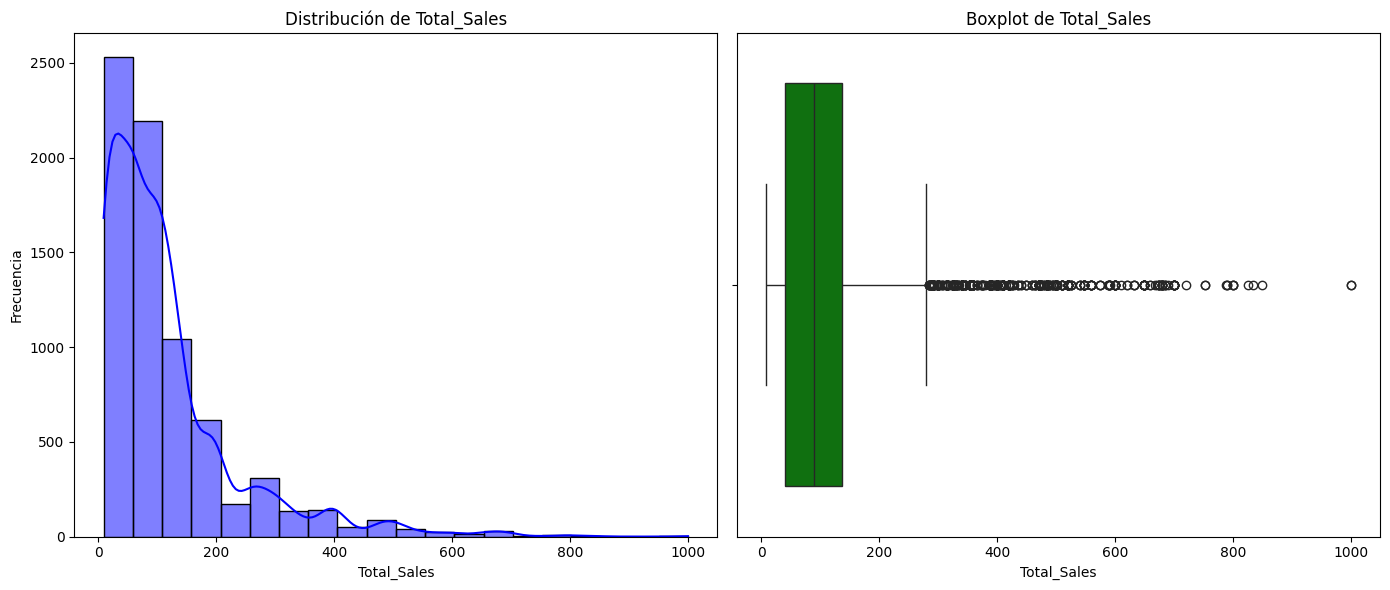

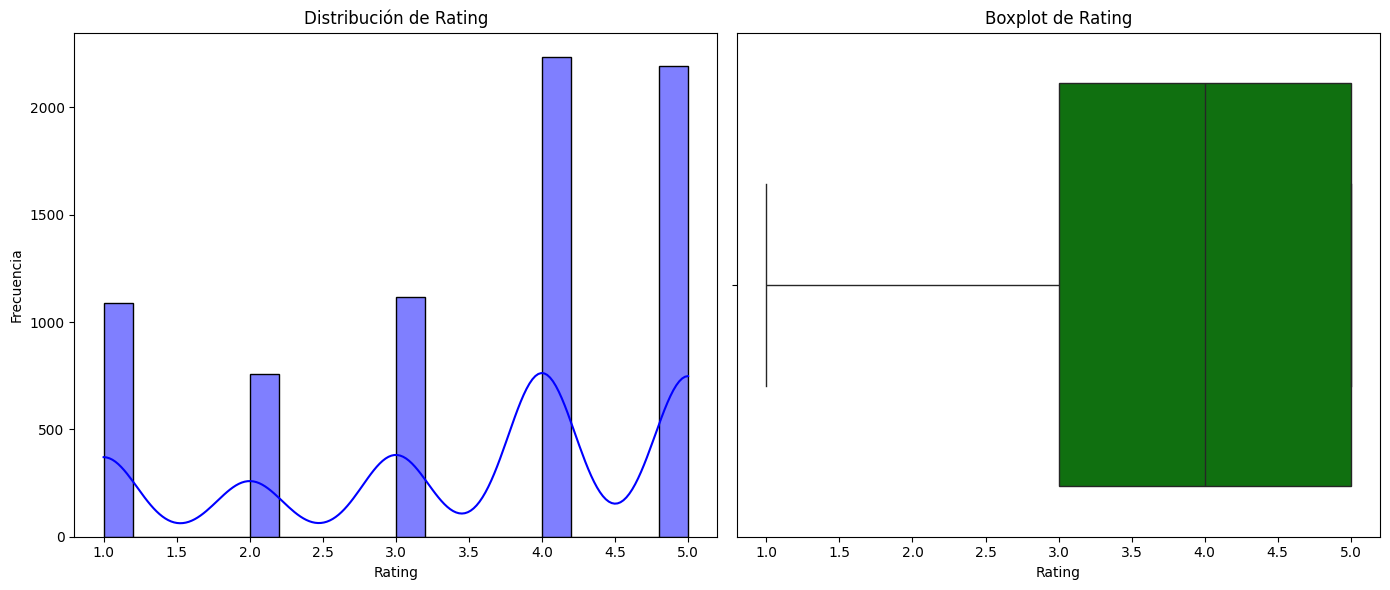

In [27]:
# Analizando si tenemos outliers
analizar.plot_numeric()

In [28]:
# Tenemos muchos Outliers en Total_sales, miremos a que se deben.
Q1 = df['Total_Sales'].quantile(0.25)
Q3 = df['Total_Sales'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

# Identificar valores fuera del rango IQR
outl = df[df['Total_Sales'] > upper_limit]
no_outl = df[df['Total_Sales'] < upper_limit]

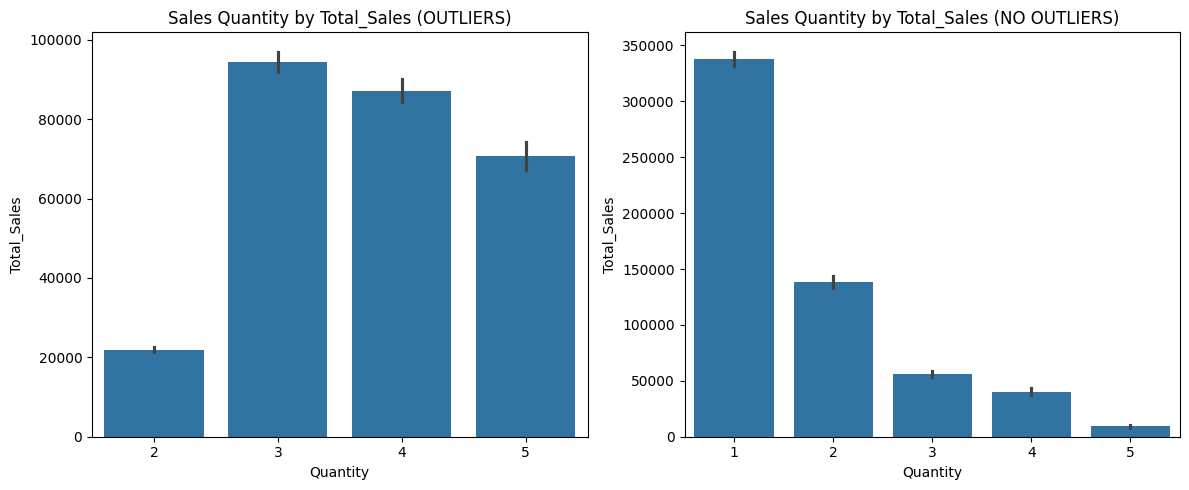

In [29]:
# Creamos 2 visualizaciones comparativas de ventas por cantidad, no outliers vs outliers

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico 1: OUTLIERS
sns.barplot(ax=axes[0],x='Quantity', y='Total_Sales', data=outl, estimator=sum)
axes[0].set_title('Sales Quantity by Total_Sales (OUTLIERS)')

# Grafico 2: NO OUTLIERS
sns.barplot(ax=axes[1],x='Quantity', y='Total_Sales', data=no_outl, estimator=sum)
axes[1].set_title('Sales Quantity by Total_Sales (NO OUTLIERS)')

plt.tight_layout()
plt.show()

In [30]:
# Ordenamos para ver las diferencias entre las ventas por el precio de producto.
no_outl_sorted = no_outl.groupby('Sales_Price')['Total_Sales'].sum().sort_values(ascending=False).index
outl_sorted = outl.groupby('Sales_Price')['Total_Sales'].sum().sort_values(ascending=False).index

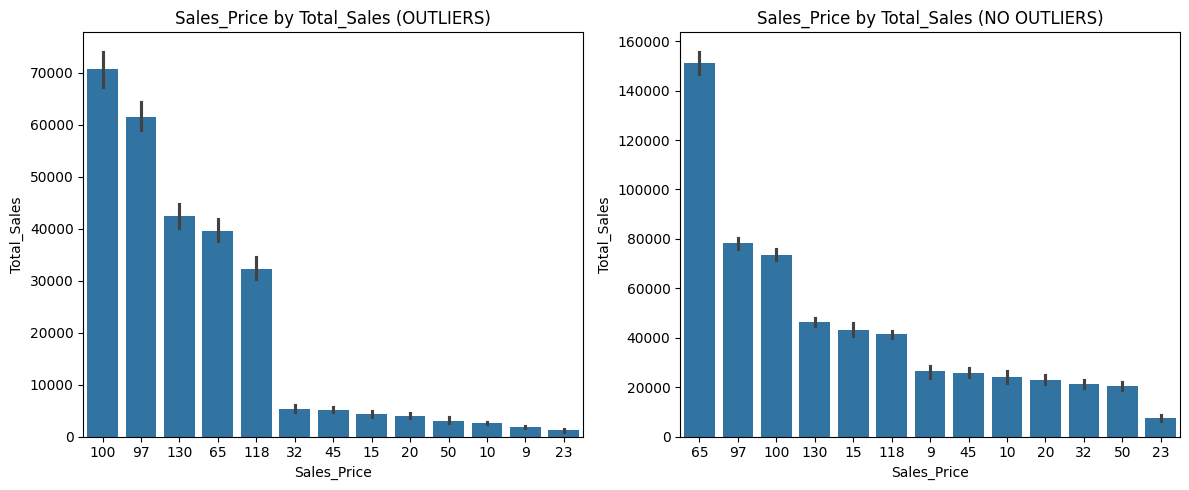

In [31]:
# Creamos 2 visualizaciones comparativas de ventas por cantidad, no outliers vs outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico 1: OUTLIERS
sns.barplot(ax=axes[0],x='Sales_Price', y='Total_Sales', data=outl,estimator=sum,order=outl_sorted)
axes[0].set_title('Sales_Price by Total_Sales (OUTLIERS)')

# Grafico 2: NO OUTLIERS
sns.barplot(ax=axes[1],x='Sales_Price', y='Total_Sales', data=no_outl,estimator=sum,order=no_outl_sorted)
axes[1].set_title('Sales_Price by Total_Sales (NO OUTLIERS)')

plt.tight_layout()
plt.show()

In [32]:
# Test de Grubbs

data = df['Total_Sales']

mean = np.mean(data)
std = np.std(data, ddof=1)
G = max(abs(data - mean)) / std
n = len(data)

# Valor crítico de Grubbs
alpha = 0.05
t_crit = t.ppf(1 - alpha / (2 * n), n - 2)
G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

print(f"Estadístico G: {G}, Valor crítico G: {G_crit}")


Estadístico G: 7.488635980149951, Valor crítico G: 4.498107725353283


### Resultado Test de Grubbs:
- Aunque la prueba señala que existen valores estadisticamente atipicos, el analisis del contexto actual demuestra que estos datos son relevantes para el negocio y deben mantenerse en el Dataset. Esto muestra un enfoque analitico equilibrado entre estadística y contexto.

### Conclusion sobre OUTLIERS.
- Sales_per_unit: Tenemos un outlier no muy alejado del ultimo dato, no lo imputaremos.
- Quantity: Tenemos 2 outliers que tambien dejaremos debido a que nos parece normal que haya 2 pedidos con mas cantitades de productos
- Total_sales: Tenemos muchos outliers, pero podemos observar que muchos de ellos son por pedidos de mas de 3 productos, y de precios mas altos. no los imputaremos debido a que es normal que esto suceda.